20
980
1000


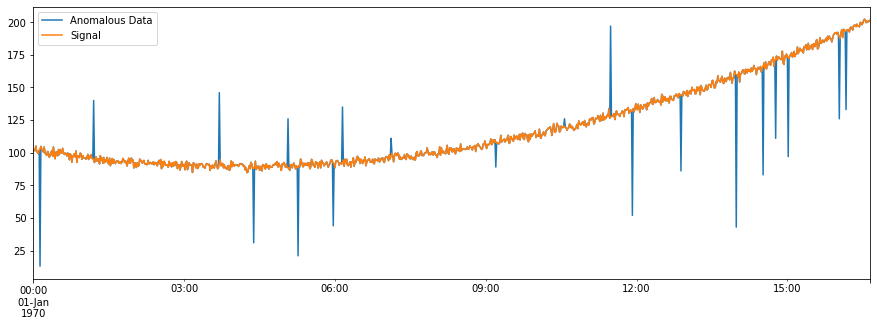

In [4]:
# Try real world example??? 
# I can#t find a case where deleted residuals are better than ordinary ones

# Generate Toy data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nx = 1000
x = np.linspace(0, 10, nx)
x_dt = pd.date_range(start="1970", periods=nx, end="02-01-1970")

y_hat =  2*x**2- 10* x + 2

sig = np.random.normal(loc=100, size=nx, scale=2) +y_hat
index = pd.date_range(start="1970", periods=nx, freq="1T")

# Add anomalies
anom_num = [111, 111, 126, 83, 133, 21, 126, 126, 97, 13, 86, 140, 44, 146, 89, 135, 52, 31, 43, 197]
anom_ids = [886, 427, 304, 871, 970, 316, 962, 634, 901, 8, 773, 72, 358, 222, 552, 369, 715, 263, 839, 689]
#anom_ids = [88, 42, 30, 87, 97, 31, 96, 63, 90, 8, 77, 2, 35, 22, 55, 36, 71, 26, 83, 68]

true_mask = [True if item in anom_ids else False for item in range(nx)]

sig[anom_ids] = anom_num

clean_sig = np.delete(sig, anom_ids)


anomalous_data = pd.Series(sig, index=index)
clean_data = pd.Series(clean_sig, index=np.delete(index, anom_ids))


anomalous_data.plot(figsize=(15,5))
clean_data.plot()
plt.legend(['Anomalous Data', 'Signal'])

print(len(anom_ids))
print(len(clean_data))
print(len(anomalous_data))


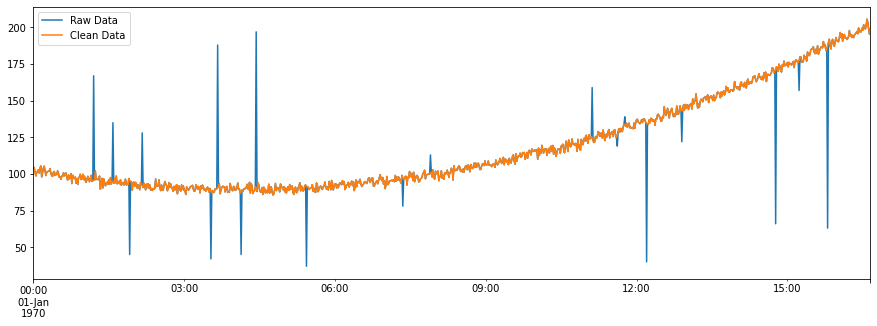

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng(12345)
# Define index
nx = 1000
index = pd.date_range(start="1970", periods=nx, freq="1T")
# Define signal and noise
x = np.linspace(0, 10, nx)
signal =  2*x**2- 10* x + 2
noise = np.random.normal(loc=100, size=nx, scale=2)
y = noise + signal
# Add anomalies
anom_num = rng.integers(low=0, high=200, size=20)
anom_ids = rng.integers(low=0, high=1000, size=20)
y[anom_ids] = anom_num
is_anom = [True if item in anom_ids else False for item in range(nx)]
# Pandas DataFrame and plot
raw_data = pd.Series(y, index = index)
clean_data = raw_data[np.invert(is_anom)] 

raw_data.plot(figsize=(15,5))
clean_data.plot()
plt.legend(['Raw Data', 'Clean Data'])

In [101]:
np.invert(is_anom)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [7]:
from sklearn.metrics import recall_score, precision_score, f1_score

def check_anomaly(pred_mask, real_mask):
    print(recall_score(real_mask, pred_mask))
    print(precision_score(real_mask, pred_mask))
    


In [223]:
len(true_mask)

100

100
99


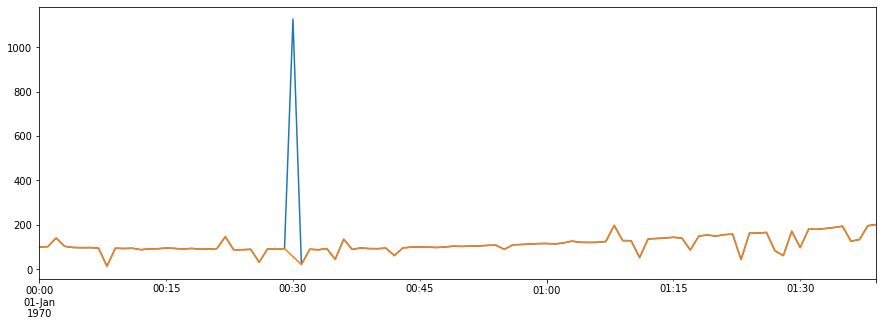

In [224]:
# Convert datetime index to integers
data=anomalous_data
alpha=1.0

poly_order = 1
x = (np.array(data.index, dtype=np.int64) - data.index[0].value) / 1e9
y = data.to_numpy()  # Just to please pandas devs

# Create a polynomial fit and apply the fit to data
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)

# Find residuals
res = (y - y_pred)
std = np.std(res)
threshold_high = np.mean(res)+3*std
threshold_low = np.mean(res)-3*std

# Mask (true if either condition is true (i.e res does NOT exceeds either threshold))
mask = np.logical_or(res >= threshold_high, res <= threshold_low)
mask = [not item for item in mask]

# Plot anomalous data and filtered data
ax=anomalous_data.plot(figsize=(15,5))
anomalous_data[mask].plot(ax=ax)

print(len(anomalous_data))
print(len(anomalous_data[mask]))


In [225]:
check_anomaly([not item for item in mask],true_mask)

0.05
1.0


(-10.0, 10.0)

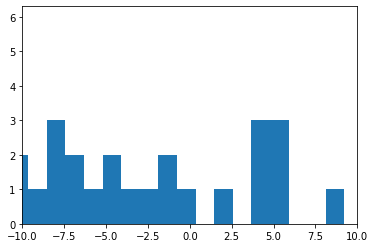

In [226]:
plt.hist(res,bins=1000)
plt.xlim([-10,10])

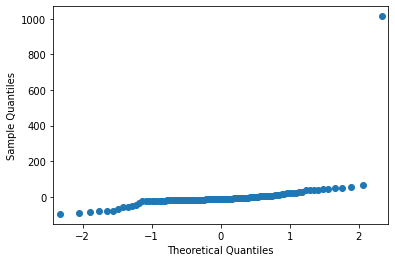

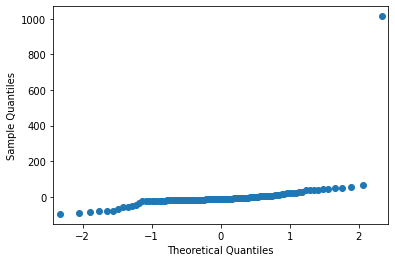

In [227]:
from statsmodels.graphics.gofplots import qqplot
qqplot(res)

In [228]:
print(res)

[ 4.12102116e+00  5.18290902e+00  4.33978540e+01  5.54416204e+00
 -6.83387568e-02 -1.71572066e+00 -1.60747526e+00 -4.46793688e+00
 -8.67652485e+01 -5.81278166e+00 -8.01808356e+00 -7.22764542e+00
 -1.43416778e+01 -1.14149866e+01 -1.10596829e+01 -8.37986977e+00
 -1.07742915e+01 -1.41837244e+01 -1.18036440e+01 -1.56120281e+01
 -1.52675229e+01 -1.45358143e+01  3.88541791e+01 -2.07785550e+01
 -2.08034438e+01 -1.94717315e+01 -7.82545559e+01 -1.83928522e+01
 -2.05174381e+01 -1.86716750e+01  1.01463671e+03 -9.08904746e+01
 -2.26572683e+01 -2.59119856e+01 -2.05637788e+01 -6.99992096e+01
  2.04736067e+01 -2.64941261e+01 -1.99803250e+01 -2.35839695e+01
 -2.45902380e+01 -2.25694745e+01 -5.66894958e+01 -2.25936779e+01
 -1.96405379e+01 -1.97642770e+01 -2.05881307e+01 -2.29768351e+01
 -2.10213107e+01 -1.78257565e+01 -1.96150909e+01 -1.87527728e+01
 -1.86884573e+01 -1.64775358e+01 -1.60982312e+01 -3.55428844e+01
 -1.57933799e+01 -1.47086284e+01 -1.32101514e+01 -1.17300546e+01
 -1.17450323e+01 -1.43121

20
99


100

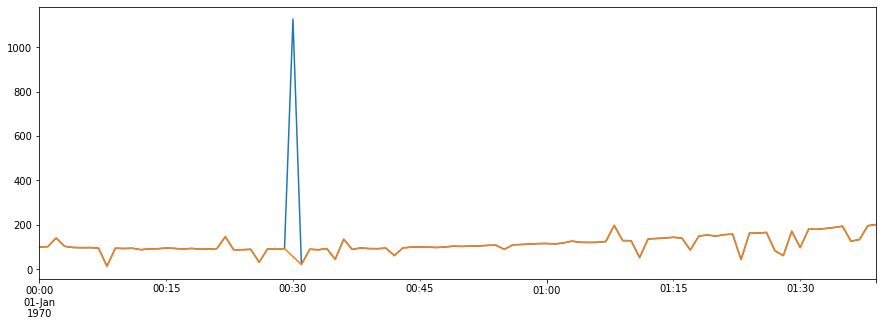

In [229]:
# Convert datetime index to integers
data=anomalous_data
alpha=1.0


store=[]
for item in range(len(data)):
    to_drop = data.index[item]
    tmp = data.drop(to_drop)
    
    poly_order = 3
    real_x = (np.array(data.index, dtype=np.int64) - data.index[0].value) / 1e9
    real_y = data.to_numpy()
    
    x = (np.array(tmp.index, dtype=np.int64) - tmp.index[0].value) / 1e9
    y = tmp.to_numpy()  # Just to please pandas devs

    # Create a polynomial fit and apply the fit to data
    coefs = np.polyfit(x, y, poly_order)
    y_pred = np.polyval(coefs, real_x)

    # Find residuals
    res = (real_y[item] - y_pred[item])
    store.append(res)

# Find residuals
std = np.std(store)
threshold_high = np.mean(store)+1*std
threshold_low = np.mean(store)-1*std

# Mask (true if either condition is true (i.e res does NOT exceeds either threshold))
mask = np.logical_or(store >= threshold_high, store <= threshold_low)
mask = [not item for item in mask]

# Plot anomalous data and filtered data
ax=anomalous_data.plot(figsize=(15,5))
anomalous_data[mask].plot(ax=ax)

print(len(anom_ids))
print(len(anomalous_data[mask]))
len(anomalous_data)

In [203]:
check_anomaly([not item for item in mask],true_mask)

0.9
0.9


(-10.0, 10.0)

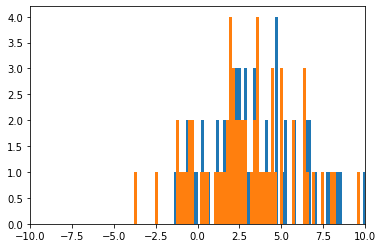

In [184]:
plt.hist(store,bins=1000)
plt.hist(res,bins=1000)
plt.xlim([-10,10])

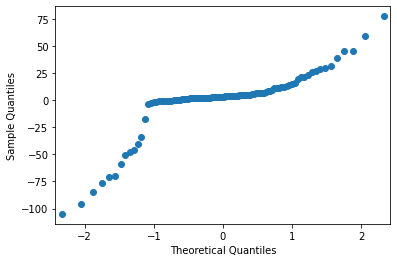

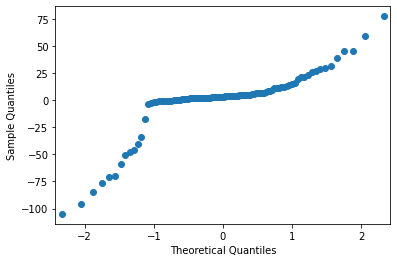

In [180]:
qqplot(np.array(store))

(-10.0, 10.0)

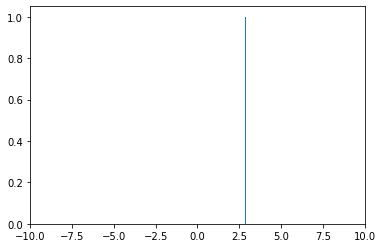

In [97]:
plt.hist(res,bins=1000)
plt.xlim([-10,10])

In [71]:
check_anomaly([not item for item in mask],[not item for item in true_mask])

0.95
1.0


20
981


1000

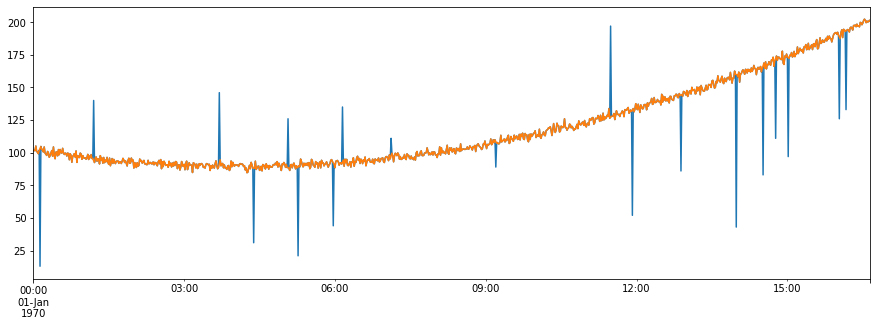

In [8]:
from scipy.stats import t as student_dist


# Convert datetime index to integers
data=anomalous_data
alpha=0.05

poly_order = 2
bc_relaxation: float = 1.0

poly_order = 2
x = (np.array(data.index, dtype=np.int64) - data.index[0].value) / 1e9
y = data.to_numpy()  # Just to please pandas devs

# Create a polynomial fit and apply the fit to data
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)


# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

# Calculate degrees of freedom
n = len(y)
dof = n - 3  # Using p = 2 from paper

# Determine the residuals and standardise them
res = y - y_pred

sse = np.sum(res ** 2)
t_res = res * np.sqrt(dof / (sse * (1 - hat_diagonal) - res))

# Return p values from Student distribution and calculate Bonferroni critical value
p_vals = student_dist.sf(t_res, df=dof)
bc = student_dist.sf(1 - alpha / (2 * n), df=dof) * bc_relaxation

# Return filtered dataframe with the anomalies removed
mask = np.logical_and(p_vals >= bc, p_vals <= (1 - bc))

# Plot anomalous data and filtered data
ax=anomalous_data.plot(figsize=(15,5))
anomalous_data[mask].plot(ax=ax)

print(len(anom_ids))
print(len(anomalous_data[mask]))
len(anomalous_data)

In [9]:
check_anomaly([not item for item in mask],true_mask)

0.95
1.0


In [10]:
# Check for Open Industrial Data
from cognite.client import CogniteClient
import os
import pandas as pd

api_key = os.environ['PUBLIC_DATA_API_KEY']
client = CogniteClient(api_key=api_key, client_name='public-data-user')



/home/keepfloyding/.env/lib64/python3.9/site-packages/cognite/client/_cognite_client.py:80: UserWarning: You are using version 2.25.0 of the SDK, however version 2.41.0 is available. Upgrade or set the environment variable 'COGNITE_DISABLE_PYPI_VERSION_CHECK' to suppress this warning.
  self._config = ClientConfig(
/tmp/ipykernel_38405/1076243685.py:7: UserWarning: Authenticated towards inferred project 'publicdata'. Pass project to the CogniteClient constructor or set the environment variable 'COGNITE_PROJECT' to suppress this warning.
  client = CogniteClient(api_key=api_key, client_name='public-data-user')


In [55]:
df = client.datapoints.retrieve(external_id='pi:160696', start='200d-ago', end='now', granularity='1h', aggregates=['average']).to_pandas()

<AxesSubplot:>

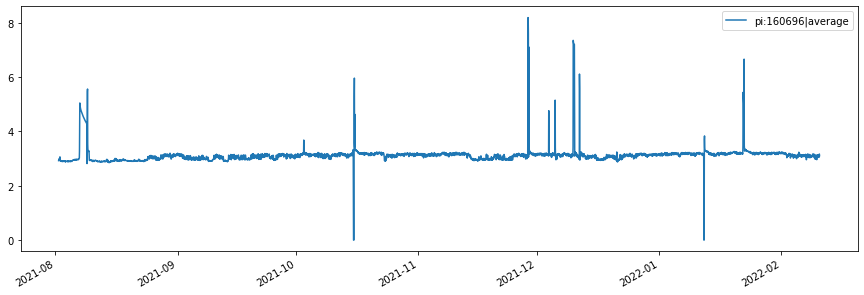

In [56]:
df.plot(figsize=(15,5))

In [57]:
len(df)

4631

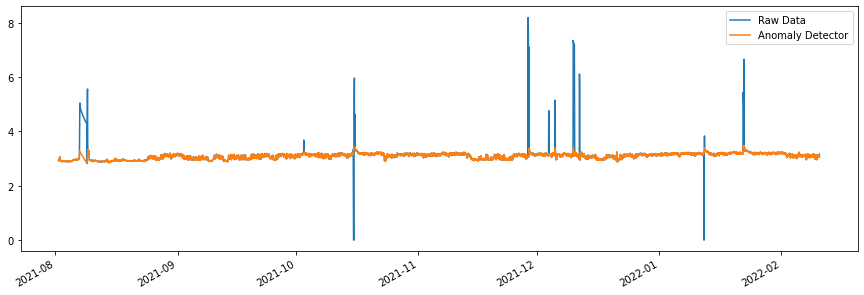

In [63]:
from scipy.stats import t as student_dist


# Convert datetime index to integers
data=df
alpha=0.05

poly_order = 2
bc_relaxation: float = 1.0

poly_order = 2
x = (np.array(data.index, dtype=np.int64) - data.index[0].value) / 1e9
n = len(x)

y = data.to_numpy().reshape(1,n)[0]  # Just to please pandas devs

# Create a polynomial fit and apply the fit to data
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)


# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

# Calculate degrees of freedom

dof = n - 3  # Using p = 2 from paper

# Determine the residuals and standardise them
res = y - y_pred

sse = np.sum(res ** 2)
t_res = res * np.sqrt(dof / (sse * (1 - hat_diagonal) - res))

# Return p values from Student distribution and calculate Bonferroni critical value
p_vals = student_dist.sf(t_res, df=dof)
bc = student_dist.sf(1 - alpha / (2 * n), df=dof) * bc_relaxation

# Return filtered dataframe with the anomalies removed
mask = np.logical_and(p_vals >= bc, p_vals <= (1 - bc))

# Plot anomalous data and filtered data
ax=df.plot(figsize=(15,5))
df[mask].plot(ax=ax)
plt.legend(['Raw Data','Anomaly Detector'])

#print(len(anom_ids))
#print(len(anomalous_data[mask]))
#len(anomalous_data)

In [65]:
df = client.datapoints.retrieve(external_id='pi:160183', start='200d-ago', end='now', granularity='1h', aggregates=['average']).to_pandas()



<AxesSubplot:>

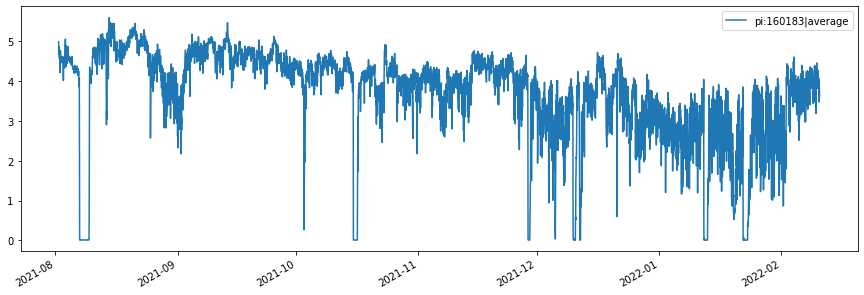

In [66]:
df.plot(figsize=(15,5))

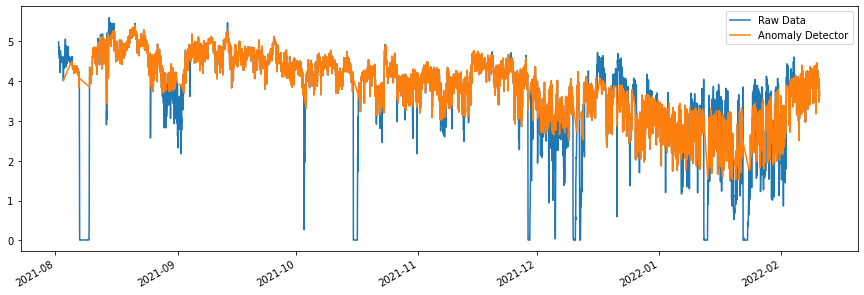

In [80]:
from scipy.stats import t as student_dist


# Convert datetime index to integers
data=df
alpha=0.05

bc_relaxation: float = 1.0

poly_order = 5
x = (np.array(data.index, dtype=np.int64) - data.index[0].value) / 1e9
n = len(x)

y = data.to_numpy().reshape(1,n)[0]  # Just to please pandas devs

# Create a polynomial fit and apply the fit to data
coefs = np.polyfit(x, y, poly_order)
y_pred = np.polyval(coefs, x)


# Calculate hat matrix
X_mat = np.vstack((np.ones_like(x), x)).T
X_hat = X_mat @ np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T
hat_diagonal = X_hat.diagonal()

# Calculate degrees of freedom

dof = n - 3  # Using p = 2 from paper

# Determine the residuals and standardise them
res = y - y_pred

sse = np.sum(res ** 2)
t_res = res * np.sqrt(dof / (sse * (1 - hat_diagonal) - res))

# Return p values from Student distribution and calculate Bonferroni critical value
p_vals = student_dist.sf(t_res, df=dof)
bc = student_dist.sf(1 - alpha / (2 * n), df=dof) * bc_relaxation

# Return filtered dataframe with the anomalies removed
mask = np.logical_and(p_vals >= bc, p_vals <= (1 - bc))

# Plot anomalous data and filtered data
ax=df.plot(figsize=(15,5))
df[mask].plot(ax=ax)
plt.legend(['Raw Data','Anomaly Detector'])

#print(len(anom_ids))
#print(len(anomalous_data[mask]))
#len(anomalous_data)

In [64]:
client.time_series.retrieve(external_id='pi:160696')

,value
id,1164067007934960
external_id,pi:160696
name,VAL_23-PT-92504:X.Value
is_string,False
asset_id,5193727763959013
is_step,False
description,PH 1stStgSuctCool Gas Out
security_categories,[]
created_time,1593024714298
last_updated_time,1593512857019


array([3.15127402, 3.13817588, 3.15686533, ..., 3.14904538, 3.16959069,
       3.11013712])